Получите данные и загрузите их в рабочую среду.

In [72]:
import pandas as pd

df_adult = pd.read_csv('adult.csv')
df_adult.head()
# df_adult.info()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [73]:
def nulls_checker(df):
    cols_with_null = []
    for i in pd.isnull(df):
        if pd.isnull(i):
            cols_with_null.append(i)

    if len(cols_with_null) > 0:
        print(f"This columns contain nulls: {cols_with_null}")
    else:
        print("No null values found. Dataset is good.")

nulls_checker(df_adult)

No null values found. Dataset is good.


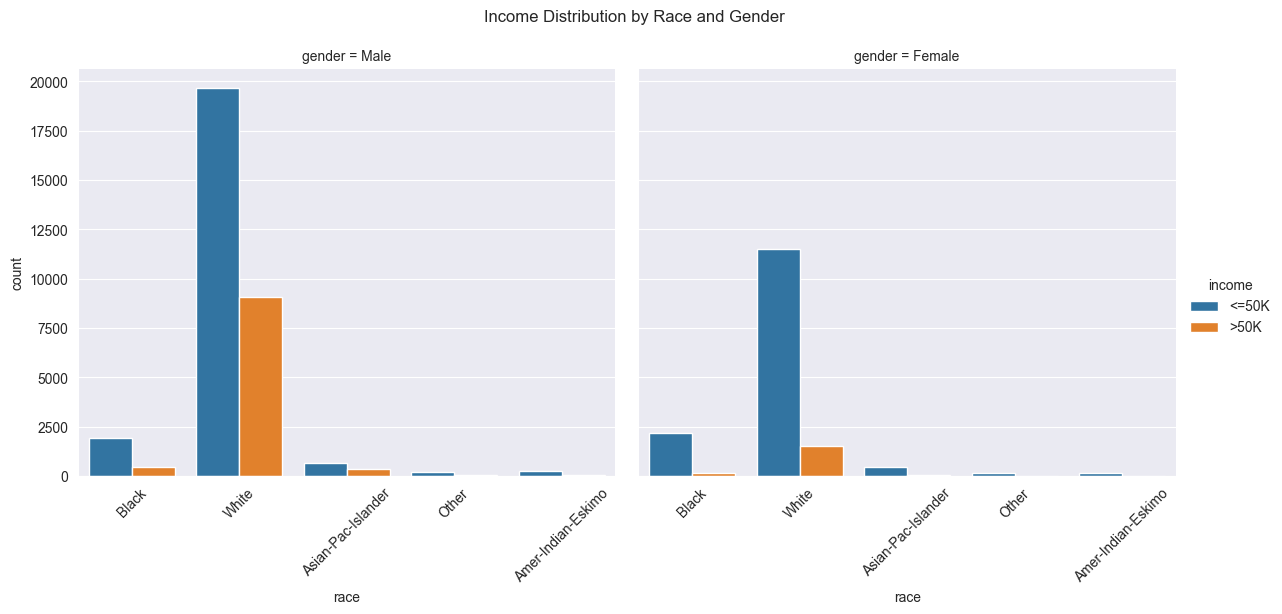

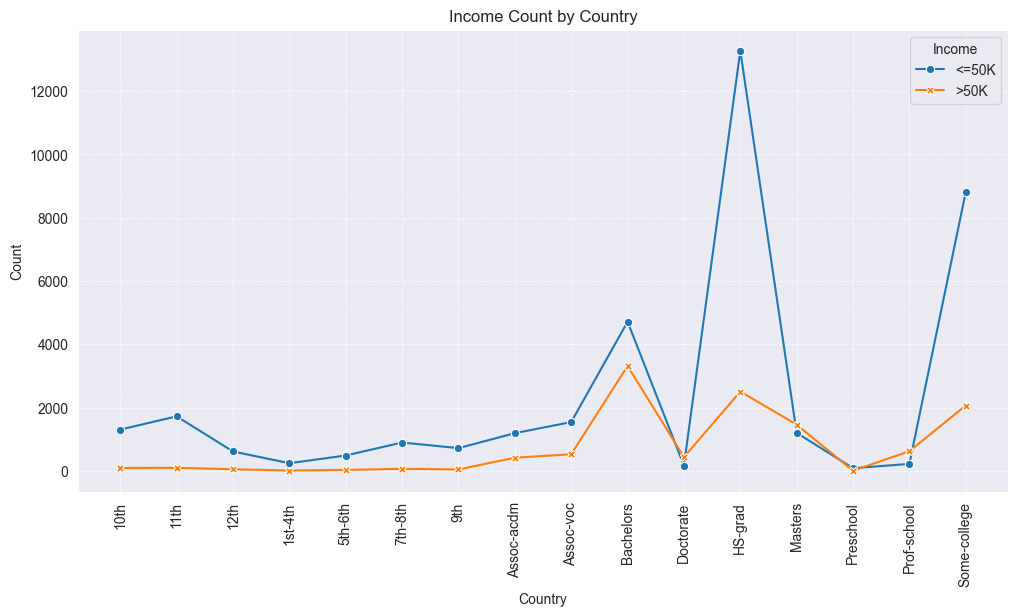

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.catplot(x='race', hue='income', col='gender',
                data=df_adult, kind='count',
                height=5, aspect=1.2)
g.set_xticklabels(rotation=45)
g.fig.suptitle('Income Distribution by Race and Gender', y=1.05)
plt.show()

income_counts = df_adult.groupby(['education', 'income']).size().reset_index(name='count')

income_pivot = income_counts.pivot(index='education', columns='income', values='count').fillna(0)
plt.figure(figsize=(12, 6))
sns.lineplot(data=income_pivot, markers=True, dashes=False)
plt.title('Income Count by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Income')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

features_df = df_adult[['education', 'race', 'gender', 'workclass', 'occupation', 'marital-status', 'hours-per-week', 'relationship', 'age', 'income']]

X = pd.get_dummies(features_df.drop('income', axis=1)) # ['<=50K' '>50K'] [0, 1]

le.fit(df_adult['income'])
y = pd.Series(data=le.transform(features_df['income']))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# y_pred[:20]
# model.predict_proba(X_test)
model.score(X_test, y_test)

/Users/eugene_ivanov/PycharmProjects/ds_python/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8417442931722796

In [76]:
# quick model results
model.predict(X_test.iloc[:20])

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [77]:
y_test.iloc[:20].values

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

SVC model

In [78]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8233186610707339

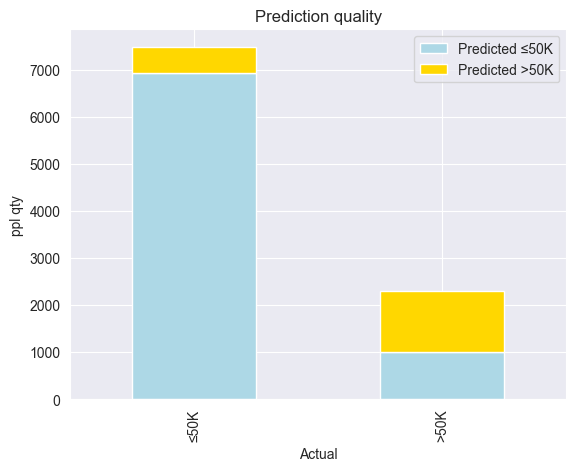

In [79]:
results = pd.DataFrame({
    'Actual': ['≤50K', '>50K'],
    'Predicted ≤50K': [sum((y_test==0) & (y_pred==0)), sum((y_test==1) & (y_pred==0))],
    'Predicted >50K': [sum((y_test==0) & (y_pred==1)), sum((y_test==1) & (y_pred==1))]
})

results.set_index('Actual').plot(kind='bar', stacked=True, color=['lightblue', 'gold'])
plt.title("Prediction quality")
plt.ylabel("ppl qty")
plt.show()

Выводы:

1) Датасет был проверен на пропуски данных в колонках которые мы планировали использовать в качестве признаков для обучения модели. Были выбраны релевантные признаки для обучения модели с целью предсказания принадлежности человека к определенной категории дохода. Категорийные переменные (признаки) были преобразованы в бинарные значения (get_dummies). Целевая переменная так же была преобразована в бинарное значение при помощи класса LabelEncoder. Датасет был разбит на обучющую (80%) и тестовую (20%) выборки, которые использовались для обучения двух моделей - логистической регрессии и SVC. Результаты прогноза классификации были оценены при помощи метода score обеих моделей на тестовых выборках.
2) По результатам сравнения тестовых выборок методом score логистическая регрессия показала более лучший результат точности прогноза (84%) против 82% SVC. К тому же SVC обучался значительно дольше.
3) Для того чтобы возможно улучшить результат прогноза необходимо поэкспериментировать с разными ядрами SVC и различными комбинациями признаков для обучения, оставить те, котоые наиболее качественно влияют на предсказание целевой переменной.